<center><h3>Abstract</h3></center><br>
This report will discuss about how to analyse "Linear Time-invariant" **LTI** Systems
with numerical tools in Python.It uses Laplace transform to solve the differential equations of the system rather than time domain analysis,which is very effective as Laplace transform changes the problem into polynomial equations which are otherwise differential equations in time domain.So it focuses on how to analyse the $LTI$ system when governing system equations with proper initial conditions given using Laplace transform and convolution.We later discuss about steady state solutions of electrical circuits and analyse their response to step inputs.

# Introduction
* We analyse the infamous LTI systems in continuous time using Laplace transform to find the solutions to the equations governing the system with the help of python tools such as Signal toolbox       
  * $system.impulse \to$ Computes the impulse response of the transfer function
  * $sp.lsim \to$ This simulates $y=u(t)*h(t)$ taking $u(t)$ and $\mathcal{H(s)}$ as arguments
  * $sp.lti  \to$ defines a transfer function from polynomial coefficients of numerator and denominator as inputs.
  * $bode() \to $ It's used to find the magnitude and phase response of transfer function


* We use following method to find the Laplace transform of a time domain signal, here we use these methods to find laplace of system governing differential coefficients 


* Some of the equations to follow while finding laplace transform 

\begin{equation}
    \mathscr{L}\{x(t)\} \to \mathcal{X(s)}
\end{equation}

\begin{equation}
    \mathscr{L}\{\frac{dx(t)}{dt}\} \to \mathcal{sX(s)-x(0^{-})}
\end{equation}

\begin{equation}
    \mathscr{L}\{\frac{d^{2}x(t)}{dt^{2}}\} \to \mathcal{s^{2}X(s)-sx(0^{-})-\dot x(0^{-})}
\end{equation}

* Combining the above equations above, we find the laplace transform of a differential equation and analyse them.

In [1]:
# load libraries and set plot parameters
from pylab import *
%matplotlib inline
from  tabulate import tabulate
import scipy.signal as sp

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"


## Question 1 & 2:
* To solve for the time repsonse of the spring mass system,whose driving force varies as $f(t)$ given as 

  
\begin{equation}
f(t) = \cos(1.5t) e^{-0.5t}u_0(t)
\end{equation}
   
* Laplace transform of $f(t)$ using equations (1),(2) & (3) given above

\begin{equation}
    \mathcal{F(s)} = \frac{s+0.5}{(s+0.5)^2 + 2.25}
\end{equation}
 
 
* Spring satisfies the below equation with $x(0)$ $=$ $0$ and $\dot x(0)$ $=$ $0$ for $ 0 \leq t \leq 50s$.

\begin{equation}
\ddot x + 2.25x = f(t)
\end{equation}

* So we take laplace transform of the equation given above with given intial conditions and in generalised form considering $w_{0}^{2} = 2.25 $ in the differential equation above, natural frequency of the system is $w_0 = 1.5 rads^{-1}$,and decay factor of $f(t)$ as $d = 0.5$ and frequency of the input as $w = 1.5 rads^{-1}$ in this question. 


* In general we get

\begin{equation}
    \mathcal{X(s)} = \frac{s+d}{((s+d)^2 + w^2)(s^2 + w_{0}^{2})}
\end{equation}


* In question 1 we get with given values and $d = 0.5$

\begin{equation}
    \mathcal{X(s)} = \frac{s+0.5}{((s+0.5)^2 + 2.25)(s^2 + 2.25)}
\end{equation}


* Solve the above problem with much smaller decay   with same initial conditions, now $f(t)$ is as follows

\begin{equation}
f(t) = \cos(1.5t) e^{-0.05t}u_0(t)
\end{equation}

* So in question 2 we get with $d = 0.05$

\begin{equation}
    \mathcal{X(s)} = \frac{s+0.05}{((s+0.05)^2 + 2.25)(s^2 + 2.25)}
\end{equation}



* To solve for $x(t)$ displacement for each of the cases using Laplace transform with python tools such as $system.impulse$ and plot them.
* To analyse the plots obtained and discuss the effect of decay on $x(t)$.

In [2]:
'''
function to solve for x(t)
Arguments : x0    - x(0)
            x0dot - derivative of x at x=0
            decay - decay factor
            freq  - frequency at which spring operates(resonant case)
Returns   : t and x(t)
'''
def laplaceSolver(x0,x0dot,decay,freq):    
    Xnum = poly1d([1,decay])+polymul([x0,x0dot],[1,2*decay,(pow(freq,2)+pow(decay,2))])
    Xden = polymul([1,0,pow(freq,2)],[1,2*decay,(pow(freq,2)+pow(decay,2))])
    
    #Computes the impulse response of the transfer function
    Xs = sp.lti(Xnum,Xden)
    t,x=sp.impulse(Xs,None,linspace(0,100,10000))
    return t,x


In [3]:
# solving for two cases with decay of 0.5 and 0.05

t1,x1 = laplaceSolver(0,0,0.5,1.5)
t2,x2 = laplaceSolver(0,0,0.05,1.5)
t3,x3 = laplaceSolver(0,0,0.005,1.5)
t4,x4 = laplaceSolver(0,0,5,1.5)



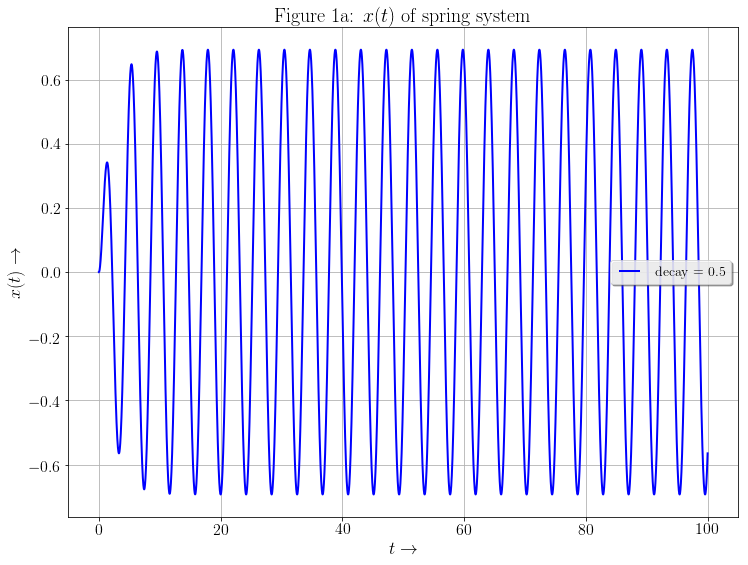

In [4]:
#plot of x(t) with decay of 0.5

fig1a = figure()
ax1a = fig1a.add_subplot(111)
ax1a.plot(t1,x1,'b',label="decay = 0.5")
ax1a.legend()
title(r"Figure 1a: $x(t)$ of spring system")
xlabel(r"$t \to $")
ylabel(r"$x(t) \to $")
grid()
savefig("Figure1a.jpg")

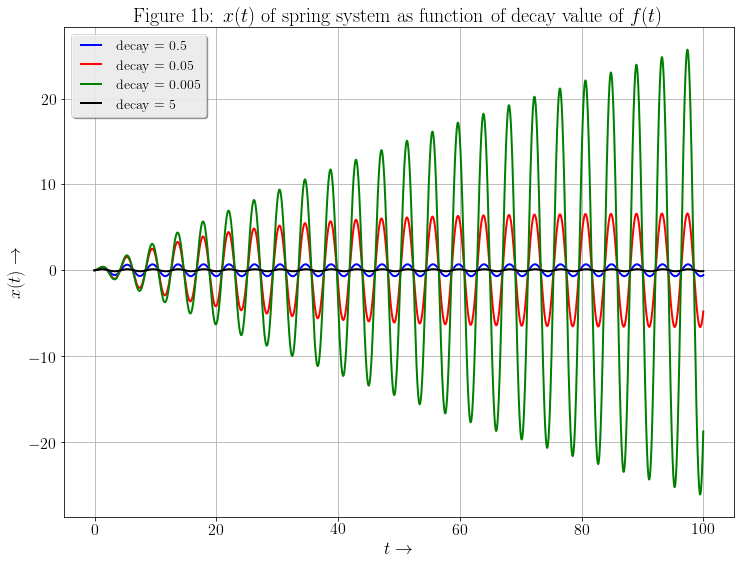

In [5]:
#plot of x(t) with decay values of 0.5 and 0.05
fig1 = figure()
ax1 = fig1.add_subplot(111)
ax1.plot(t1,x1,'b',label="decay = 0.5")
ax1.plot(t2,x2,'r',label="decay = 0.05")
ax1.plot(t3,x3,'g',label="decay = 0.005")
ax1.plot(t4,x4,'k',label="decay = 5")

ax1.legend()
title(r"Figure 1b: $x(t)$ of spring system as function of decay value of $f(t)$")
xlabel(r"$t \to $")
ylabel(r"$x(t) \to $")
grid()
savefig("Figure1b.jpg")


### Results and Discussion :
* As we observe the plot that for smaller decay of $e^{-0.05t}$ and $e^{-0.005t}$,etc.$x(t)$ has large amplitude and its growing as time increases and oscillates.

* Whereas the for higher decay values the amplitude of $x(t)$ is very small but since its second order system it oscillates.

* And If we observe the Figure 1a, amplitude growth stopped and settles quicker than for smaller decay values whereas for small decay values the $x(t)$ amplitude settling time is larger because as given below:

* Our input $f(t)$ to the system has natural frequency that is $w=w_0$, so its a resonant case,so the solution of differentail equation for sinusoidal inputs from observing the plot can be of the form $te^{-dt}\cos (w_0 t)$ so for smaller decay values the graph takes more time neutralise the growing effect of $t$ in the solution.

* So to conclude for small decay , $x(t)$ has large amplitude and the time required for it settle or saturate to a certain maximum amplitude is higher compared to large decay case

## Question 3:
* In an LTI system. $f(t)$ is the input, and $x(t)$ is the output.


* To Obtain the system transfer function $\frac{\mathcal {X(s)}}{ \mathcal {F(s)}}$ 


* we use $signal.lsim$ to simulate the problem.


* Here we try to plot the system response for different values of excitation frequecies i.e input frequencies with natural frequency of the system as $w_0 = 1.5 rads^{-1}$


* So using a for loop, we sweep the frequency $w$ of the $f(t)$ from $1.4$ to $1.6$ in steps of $0.05$ keeping the exponent as $e^{−0.05t}$ that is $d=0.05$ and plot the resulting responses.


* So with above conditions laplace transform of $x(t)$ is 

\begin{equation}
    \mathcal{X(s)} = \frac{s+0.05}{((s+0.05)^2 + w^2)(s^2 + 2.25)}
\end{equation}

* So we transfer function of the system is 

\begin{equation}
    \mathcal{H(s)} = \frac{s+0.05}{((s+0.05)^2 + w^2)(s^2 + 2.25)}
\end{equation}

\begin{equation}
    \mathcal{H(s)} = \frac{s+0.05}{((s+0.05)^2 + w^2)(s^2 + 2.25)}
\end{equation}

* Using this we analyse the results.

In [6]:
'''
function to return f(t) for various parameters
Arguments : t     - time
            freq  - frequency at system is excited
            decay - decay factor
Returns   : t and x(t)
'''

def f(t,freq,decay):
    return cos(freq*t)*exp(-decay*t)


In [7]:
'''
function to solve for Transfer function H(s)
Arguments : x0    - x(0)
            x0dot - derivative of x at x=0
            decay - decay factor
            freq  - frequency at which system is excited
Returns   : Hs    - transfer function of the system
'''

def getTransferfunc(x0,x0dot,decay,freq):    
    
    #natural frequency is 1.5rad/s
    nat_freq = 1.5
    Hnum = poly1d([1,decay])+polymul([x0,x0dot],[1,2*decay,(pow(freq,2)+pow(decay,2))])+poly1d([1])
    Hden = polymul([1,0,pow(nat_freq,2)],[1,decay])
    
    #Computes the impulse response of the transfer function
    Hs = sp.lti(Hnum,Hden)
    return Hs


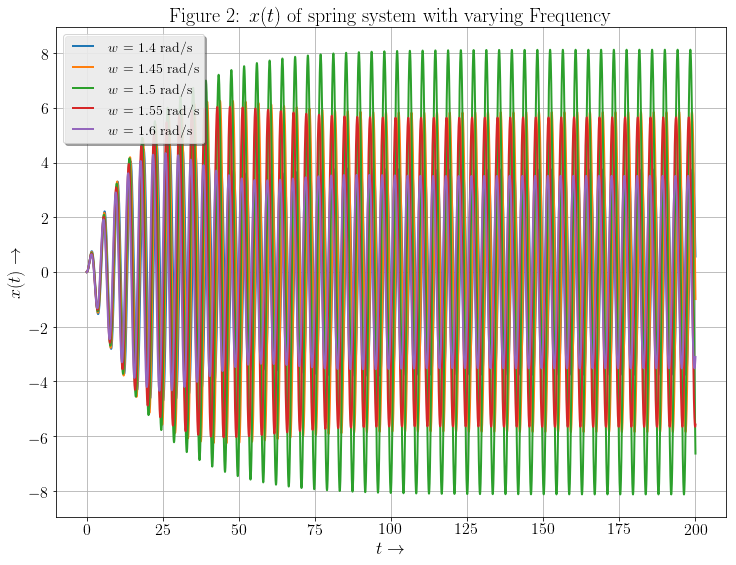

In [8]:
#Plot of x(t) with different input frequencies
fig2 = figure()
ax2 = fig2.add_subplot(111)
title(r"Figure 2: $x(t)$ of spring system with varying Frequency")

#For loop  to plot x(t) for different values of freq
for w in arange(1.4,1.6,0.05):
    decay = 0.05
    H = getTransferfunc(0,0,decay,w)
    t = linspace(0,200,10000)
    t,y,svec=sp.lsim(H,f(t,w,decay),t)
    legnd = "$w$ = %g rad/s"%(w) 
    ax2.plot(t,y,label=legnd) 
    ax2.legend()
    
xlabel(r"$t \to $")
ylabel(r"$x(t) \to $")
grid()
savefig("Figure2.jpg")
show()


### Results and Discussion:
* As we observe figure 2 that,when we force (we are basically exciting the spring mass system with $f(t)$) the system with $w \neq w_0$ where $w_0 = 1.5$ and $w \approx w_0$ i.e around 1.5 $rads^{-1}$,since intially the system is at rest,so when f(t) is forced upon it,they are in phase,so constructive superposition occurs so the amplitude of $x(t)$ increases in same fashion for $w$ very close to $w_0$ at starting , after that since the forced and natural frequency are not same,it is detuned so amplitude after peak amplitude starts falling slightly but at steady state all forced response dies out,so basically $x(t)$ will vary only with natural mode since forced response died out eventually.
* Whereas for $w=w_0$ case resonant occurs,so system and forcing input have same frequency so,the forced response adds up to natural response basically 'tuned',so the amplitude is very high in steady state.

## Question 4:
* To Solve for a coupled spring problem:

* System satisfies the below equation with $x(0) = 1$ and $\dot x(0) = y(0) = \dot y(0) = 0$.

\begin{equation}
\ddot x + (x-y) = 0
\end{equation}

\begin{equation}
\ddot y + 2(y-x)= 0
\end{equation}

* Solve for $x(t)$ and $y(t)$ for $ 0 \leq t \leq 20s$ by taking laplace transform of both equations given above and solve for $\mathcal {X(s)}$ and $\mathcal{Y(s)}$ using substitution method.

* Now from $\mathcal {X(s)}$ and $\mathcal{Y(s)}$ find $x(t)$ and $y(t)$ using $system.impulse$.

* Plot $x(t)$ and $y(t)$ in the same graph and analyse them

In [9]:
'''
function to solve for Transfer function H(s)
Arguments : num_coeff   - array of coefficients of denominator polynomial
            den_coeff   - array of coefficients of denominator polynomial
Returns   : t,h         - time and response of the system
'''   

def coupledSysSolver(num_coeff,den_coeff):
    H_num = poly1d(num_coeff)
    H_den = poly1d(den_coeff)
    
    Hs = sp.lti(H_num,H_den)
    t,h=sp.impulse(Hs,None,linspace(0,20,1000))
    return t,h


In [10]:
#find x and y using above function
t1,x  = coupledSysSolver([1,0,2],[1,0,3,0])
t2,y = coupledSysSolver([2],[1,0,3,0])


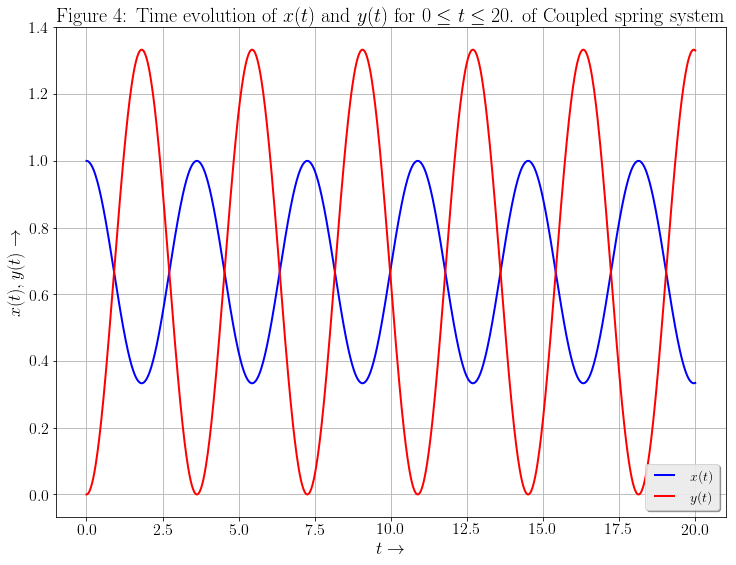

In [11]:
#plot x(t) and y(t)
fig4 = figure()
ax4 = fig4.add_subplot(111)
ax4.plot(t1,x,'b',label="$x(t)$")
ax4.plot(t2,y,'r',label="$y(t)$")
ax4.legend()
title(r"Figure 4: Time evolution of $x(t)$ and $y(t)$ for $0 \leq t \leq 20$. of Coupled spring system ")
xlabel(r"$t \to $")
ylabel(r"$x(t),y(t) \to $")
grid()
savefig("Figure4.jpg")


### Results and Discussion:
* As we observe figure 4 that, the $x(t)$ and $y(t)$ obtained satisfies the given initial conditions,and oscillating sinusoidally with $180^{o}$ out of phase 

## Question 5:
* To Obtain the magnitude and phase response of the Steady State Transfer function of the following two-port network

* Transfer function of the RLC network from input to voltage at capacitor in general for given Network is 


\begin{equation}
    \frac{\mathcal{V_{0}(s)}}{\mathcal{V_{i}(s)}} = \mathcal{H(s)} = \frac{1}{s^{2}LC + sRC + 1}
\end{equation}

* For the given values of $ R = 100 \Omega$,$ L = 1\mu H$,$C= 1\mu F$

* We get

\begin{equation}
    \mathcal{H(s)} = \frac{1}{s^{2}10^{-12} + s10^{-4} + 1}
\end{equation}

* can be written as 

\begin{equation}
    \mathcal{H(s)} = \frac{1}{(1 + \frac{s}{10^{8}})(1 + \frac{s}{10^{4}})}
\end{equation}

* So system has poles on left half s plane, that too real poles with $ s = -10^4,-10^8 rads^{-1}$, we will observe the effect of poles on magnitude and phase response by analysing plots of them

* Magnitude Response is $|H(s)|$ evaluated at any point on imaginary axis so basically $|H(j\omega)|$

* Phase response is $\angle H(j\omega)$

* Using $\mathcal{H(s)}$ we calculate magnitude and phase response of it using $Bode()$ and plot them and analyse.


In [12]:
'''
function to solve for Transfer function H(s)
Arguments : H         - Transfer function.
Returns   : w,mag,phi
'''   

def CalcMagPhase(H):
    w,mag,phi=H.bode()
    return w,mag,phi


In [13]:
'''
function to solve given RLC network for any R,L,C values
Returns   : w,mag,phi,Hs
'''  

def RLCnetwork(R,C,L):
    Hnum = poly1d([1])
    Hden = poly1d([L*C,R*C,1])
    
    #Computes the impulse response of the transfer function
    Hs = sp.lti(Hnum,Hden)
    #Calculates magnitude and phase response
    w,mag,phi = CalcMagPhase(Hs)
    return w,mag,phi,Hs


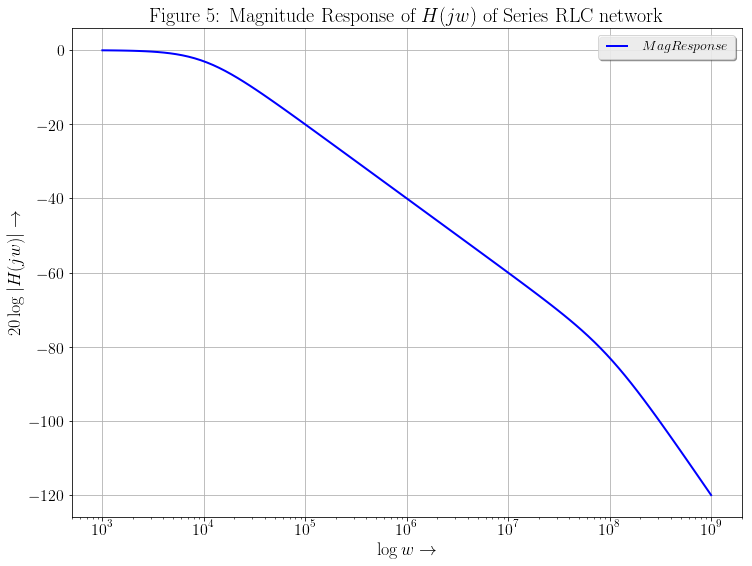

In [14]:
#Finds magnitude and phase response of Transfer function
R = 100
L = 1e-6
C = 1e-6
w,mag,phi,Hrlc = RLCnetwork(R,L,C)

#plot Magnitude Response 
fig5 = figure()
ax5 = fig5.add_subplot(111)
ax5.semilogx(w,mag,'b',label="$Mag Response$")
# ax5.semilogx(w,phi,'r',label="$Phase Response$")
ax5.legend()
title(r"Figure 5: Magnitude Response of $H(jw)$ of Series RLC network")
xlabel(r"$ \log w \to $")
ylabel(r"$ 20\log|H(jw)|  \to $")
grid()
savefig("Figure5.jpg")


### Results and Discussion:
* As we observe figure 5 that, its a low pass filter with dominant pole  at $\omega = 10^4 rads^{-1}$ and since the Gain i.e  $|H(j\omega)|$  at smaller frequencies is larger and as the frequency increases the gain reduces 20dB/dec after the dominant pole which is located $10^4 \leq \omega \leq 10^8$ after that it reduces more steeply with 40dB/dec.
* Since its a second order system it has two poles,as we observe from the plot that it has 2 poles at $ \omega = -10^4,-10^8 rads^{-1}$

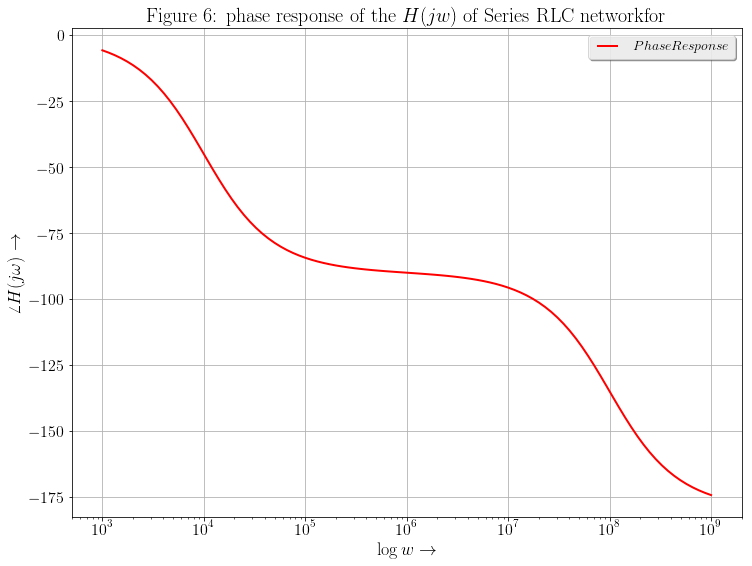

In [15]:
#Plot of phase response
fig6 = figure()
ax6 = fig6.add_subplot(111)
ax6.semilogx(w,phi,'r',label="$Phase Response$")
ax6.legend()
title(r"Figure 6: phase response of the $H(jw)$ of Series RLC networkfor")
xlabel(r"$ \log w \to $")
ylabel(r"$ \angle H(j\omega)$ $\to $")
grid()
savefig("Figure6.jpg")


### Results and Discussion:
* As we observe figure 6 that,$0 \leq \angle H(j\omega) < 180^{o}$.
* So the system is unconditionally stable since phase does not go to $180^{o}$.
* Since each pole adds $90^{o}$ to the phase its clear that the system is second order because it has two poles hence  phase go till $180^{o}$.
* And since all the poles are in left half s plane RLC Network given is unconditionally stable for given values.

## Question 6:
* Consider the problem in $Q5$.If the input signal $v_i(t)$ is given by

 \begin{equation}
 v_i(t) = \cos (10^{3}t) u(t) − \cos (10^{6}t) u(t)
 \end{equation}  
 
 
* Obtain the output voltage $v_0(t)$ using the transfer function of the system obtained.
* To explain the output signal for $ 0 < t < 30 \mu s $
* And explain the long term response on the $msec$ timescale

In [16]:
'''
function to return vi(t)
arguments : t   - time variable
            w1  - frequency of 1st cos term
            w2  - frequency of 2nd cos term
Returns   : vi(t)
'''  

def vi(t,w1,w2):
    return cos(w1*t)-cos(w2*t)


In [17]:
#Defines time from 0 to 90 msec
t  = linspace(0,90*pow(10,-3),pow(10,6))
#finding vi(t) using above function
Vi = vi(t,pow(10,3),pow(10,6))

#finds Vo(t) using lsim
t,Vo,svec=sp.lsim(Hrlc,Vi,t)
vo_ideal = cos(1e3*t)



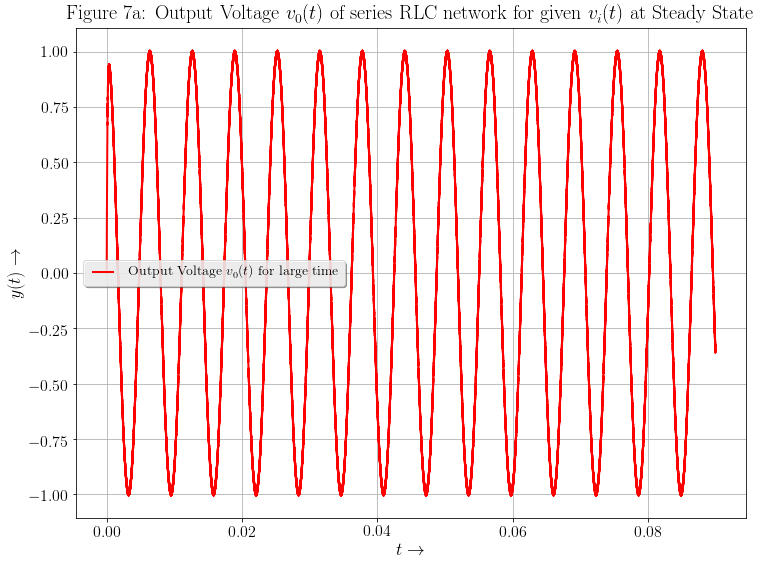

In [18]:
#plot of Vo(t) for large time i.e at steady state
#Long term response
fig7a = figure()
ax7a = fig7a.add_subplot(111)
ax7a.plot(t,Vo,'r',label="Output Voltage $v_0(t)$ for large time")
ax7a.legend()
title(r"Figure 7a: Output Voltage $v_0(t)$  of series RLC network for given $v_i(t)$ at Steady State")
xlabel(r"$ t \to $")
ylabel(r"$ y(t) \to $")
grid()
savefig("Figure7a.jpg")


### Results and Discussion:
* As we observe the plot and the circuit that we know it is a Low pass filter with bandwidth $0< \omega < 10^4$.
* So when the circuit will only pass input with frequencies which are in range of bandwidth only. But since its not a  ideal low pass filter as its gain doesn't drop abruptly at $10^4$ rather gradual decrease which is observed from magnitude response plot.
* So the output $V_o(t)$ will be mainly of $\cos(10^{3}t)$ with higher frequencies riding over it in long term response i.e Steady state solution.
* This behaviour is observed in the plot that,the $v_o(t) \approx \cos(10^{3}t)$ with higher frequencies riding over it for large time. 
* The curve is very flickery or not smooth because of the high frequency components only.
* In the next plot we'll zoom large enough to observe those components.

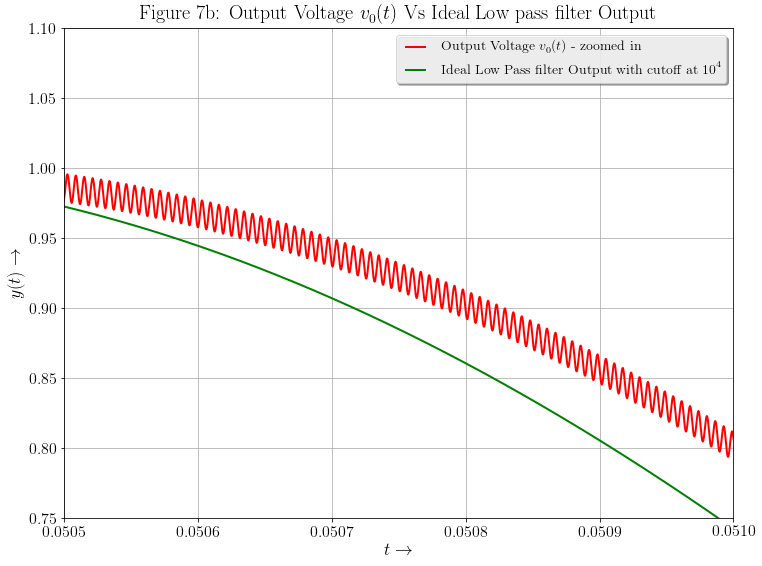

In [19]:
#plot of Vo(t) for large time i.e at steady state
#Long term response
fig7 = figure()
ax7 = fig7.add_subplot(111)
ax7.plot(t,Vo,'r',label="Output Voltage $v_0(t)$ - zoomed in ")
ax7.plot(t,vo_ideal,'g',label="Ideal Low Pass filter Output with cutoff at $10^4$")
xlim(0.0505,0.051)
ylim(0.75,1.1)
ax7.legend()
title(r"Figure 7b: Output Voltage $v_0(t)$  Vs Ideal Low pass filter Output")
xlabel(r"$ t \to $")
ylabel(r"$ y(t) \to $")
grid()
savefig("Figure7b.jpg")


### Results and Discussion:
* The oscillatory behaviour in the graph is because of high frequency components riding over the main signal which is $\cos(10^{3}t)$ since gain of the system $\approx 1$ for lower frequencies than $\omega < 10^4$ and gradually decreases as 20dB/dec which is observed from magnitude response plot and for very high frequencies 40dB/dec.
* So there will be some higher frequencies but the gain will be very less since its low pass filter ,that's why we can see there are very small sinusoidal oscillations over the main output signal compared to ideal low pass filter output which is $\cos(10^{3}t)$

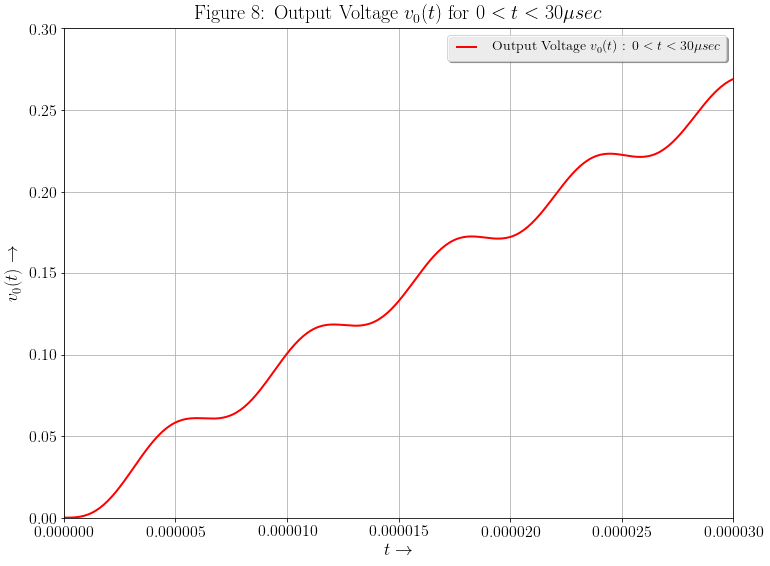

In [20]:
#Plot of Vo(t) for 0<t<30usec
fig8 = figure()
ax8 = fig8.add_subplot(111)
ax8.plot(t,Vo,'r',label="Output Voltage $v_0(t)$ : $0<t<30\mu sec$")
ax8.legend()
title(r"Figure 8: Output Voltage $v_0(t)$ for $0<t<30\mu sec$")
xlim(0,3e-5)
ylim(-1e-5,0.3)
xlabel(r"$ t \to $")
ylabel(r"$ v_0(t) \to $")
grid()
savefig("Figure8.jpg")


### Results and Discussion:
* As we observe the plot of Figure 8 , for $v_0(t)$ from $0<t<30\mu sec$ increases very fast from 0 to 0.3 in just $30\mu s$ because of transients that is we apply sinusoidal step input to the system i.e the input is zero for $t<0$,
 so when abruptly the input becomes non zero for $t \geq 0$, the system output jumps or raises suddenly from 0 to non-zero values in less time.
* That's why we observe a sharp rise in output at the start.
* And the oscillatory behaviour in the graph is because of high frequency components riding over the main signal which is $\cos(10^{3}t)$ since gain of the system $\approx 1$ for lower frequencies than $\omega < 10^4$.

## Conclusion:
* So to conclude we analysed a way to find the solution of continuous time LTI systems using laplace transform with help of python signals toolbox and got familiarised with solving of differential equations by taking laplace transform instead of doing arduous time domain analysis.